In [1]:
import os
from pathlib import Path
import pickle
from collections import defaultdict

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

import torch
import torch.nn as nn

from deep_ei import topology_of, ei_of_layer

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# dtype = torch.cuda.float if torch.cuda.is_available() else torch.float
dtype = torch.float32
torch.set_default_dtype(dtype)
print(f"Using device: {device}")

Using device: cpu


In [3]:
initializers = {
    'kaiming': None, # (default)
    'xavier_uniform': nn.init.xavier_uniform_,
    'xavier_normal': nn.init.xavier_normal_,
    'paper': nn.init.uniform_
}

def weight_initializer(name):
    def init_weights(m):
        if name == 'kaiming':
            return
        if name == 'paper':
            if isinstance(m, nn.Linear):
                boundary = 1 / np.sqrt(m.in_features)
                nn.init.uniform_(m.weight, a=-boundary, b=boundary)
        elif isinstance(m, nn.Linear):
            initializers[name](m.weight)
    return init_weights

In [4]:
widths = [10, 20, 30, 40, 50]

sample_sizes = [10000, 20000, 50000, 100000, 150000, 200000, 300000, 500000, 600000, 700000, 800000, 900000, 1000000]

# Danger Zone: Don't run if you already have the data

In [8]:
eis64 = defaultdict(list)

for width in widths:
    network = nn.Linear(width, width, bias=False).to(device)
    top = topology_of(network, input=torch.zeros((1, width)).to(device))
    network.apply(weight_initializer('paper'))
    for size in sample_sizes:
        EI = ei_of_layer(network, top, 
                         samples=size, 
                         batch_size=300, 
                         in_range=(0, 1),
                         in_bins=64,
                         out_range=(0, 1),
                         out_bins=64,
                         activation=nn.Sigmoid(),
                         device=device)
        eis64[width].append(EI)
    print("done with {}".format(width))

saved_data_dir = Path("saved_data")
if not saved_data_dir.exists():
    saved_data_dir.mkdir()

with open(saved_data_dir / "eis64.pkl", "wb") as f:
    pickle.dump(eis64, f)

done with 10
done with 20
done with 30
done with 40
done with 50


In [9]:
eis128 = defaultdict(list)

for width in widths:
    network = nn.Linear(width, width, bias=False).to(device)
    top = topology_of(network, input=torch.zeros((1, width)).to(device))
    network.apply(weight_initializer('paper'))
    for size in sample_sizes:
        EI = ei_of_layer(network, top, 
                         samples=size, 
                         batch_size=300, 
                         in_range=(0, 1),
                         in_bins=128,
                         out_range=(0, 1),
                         out_bins=128,
                         activation=nn.Sigmoid(),
                         device=device)
        eis128[width].append(EI)
    print("done with {}".format(width))

saved_data_dir = Path("saved_data")
if not saved_data_dir.exists():
    saved_data_dir.mkdir()

with open(saved_data_dir / "eis128.pkl", "wb") as f:
    pickle.dump(eis128, f)

done with 10
done with 20
done with 30
done with 40
done with 50


In [10]:
eis256 = defaultdict(list)

for width in widths:
    network = nn.Linear(width, width, bias=False).to(device)
    top = topology_of(network, input=torch.zeros((1, width)).to(device))
    network.apply(weight_initializer('paper'))
    for size in sample_sizes:
        EI = ei_of_layer(network, top, 
                         samples=size, 
                         batch_size=300, 
                         in_range=(0, 1),
                         in_bins=256,
                         out_range=(0, 1),
                         out_bins=256,
                         activation=nn.Sigmoid(),
                         device=device)
        eis128[width].append(EI)
    print("done with {}".format(width))

saved_data_dir = Path("saved_data")
if not saved_data_dir.exists():
    saved_data_dir.mkdir()

with open(saved_data_dir / "eis256.pkl", "wb") as f:
    pickle.dump(eis256, f)

done with 10
done with 20
done with 30
done with 40
done with 50


# Done with danger zone: load the data now

In [10]:
saved_data_dir = Path("saved_data")
if not saved_data_dir.exists():
    saved_data_dir.mkdir()

with open(saved_data_dir / "eis64.pkl", "rb") as f:
    eis64 = pickle.load(f)
    
with open(saved_data_dir / "eis128.pkl", "rb") as f:
    eis128 = pickle.load(f)
    
with open(saved_data_dir / "eis256.pkl", "rb") as f:
    eis256 = pickle.load(f)

In [16]:
from scipy.optimize import curve_fit

In [168]:
WIDTH = 20

In [165]:
eis256[WIDTH]

[]

In [159]:
def curve(x, a, e, C):
    return (a / (x)**e) + C

In [160]:
xs = np.array(sample_sizes)
ys = np.array(eis128[WIDTH])
params, _ = curve_fit(curve, np.array(xs), np.array(ys), p0=[1, 1, 0])

/Users/Eric/Desktop/CS_Research/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/Eric/Desktop/CS_Research/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in true_divide
  


In [161]:
params

array([3.16026821e+06, 9.15001093e-01, 3.54159988e+01])

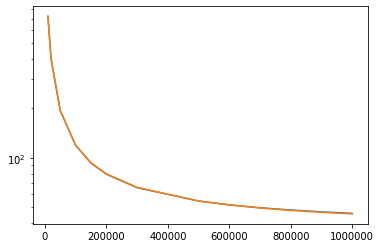

In [162]:
plt.plot(xs, ys)
plt.plot(xs, curve(xs, *params))
plt.yscale('log')